In [28]:
from keras.datasets import mnist
import numpy as np
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [29]:
print(f"Train image shape:{train_images.shape}")
print(f"Train image labels:{train_labels}")


Train image shape:(60000, 28, 28)
Train image labels:[5 0 4 ... 5 6 8]


In [30]:
print(f"Train image one element:{train_images[0]}")



Train image one element:[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

In [31]:
f = open(r"data\base_write.txt", "w")

for row in train_images[2]:
    row = str(row)
    row = row.replace("\n", "")
    print(row)
    row = row.replace("[" ,"")
    row = row.replace("]" ,"\n")
    f.write(row)

f.close()

with open(r"data\better_write.txt" , "w") as f:
    
    for row in train_images[2]:
        row = str(row)
        row = row.replace("\n", "")
        print(row)
        row = row.replace("[" ,"")
        row = row.replace("]" ,"\n")
        f.write(row)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 232  39   0   0   0   0   0]
[  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0 120 180  39   0   0   0   0   0]
[  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0   0   2 153 210  40   0   0   0   0   0]
[  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   0   0   0   0  27 254 162   0   0   0   0   0   0]
[  0   0   0   0 222 163   0   0   0   0   0   0   0   0   0   0   0   0   0 183 254 125   0   0   0   0   0   0]
[  0   0   0  46 245 163   0   0   0   0   0   0   0   0   0   0   0   0   0 198 254  56   0   0   0   0   0   0]
[  0   0   0 120 254 163  

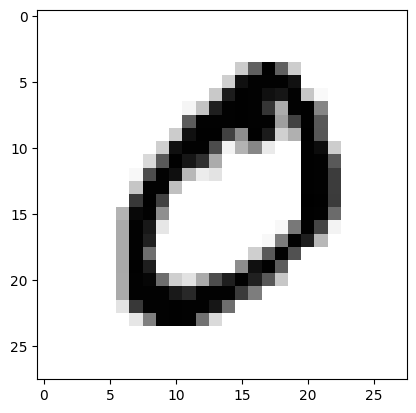

In [32]:
import matplotlib.pyplot as plt
digit = train_images[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [33]:
train_images = train_images.reshape((-1, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255




In [34]:
from keras import models
from keras import layers
from keras import optimizers

network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax', input_shape = (512 ,) ))



network.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])




c:\Users\u28o53\Desktop\Python\DiWHY_AI\.env\lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [35]:
from keras.callbacks import TensorBoard
tb = TensorBoard(log_dir='logs', histogram_freq=1, write_graph=1)

from keras.utils import to_categorical

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
print(test_labels[0])
print(test_labels_one_hot[0].astype(int))


7
[0 0 0 0 0 0 0 1 0 0]


In [36]:
network_history  = network.fit(train_images, train_labels_one_hot, epochs=5, batch_size=128 , validation_split=0.2, callbacks=[tb])

Epoch 1/5
375/375 [==============================] - 3s 6ms/step - loss: 0.2811 - accuracy: 0.9185 - val_loss: 0.1442 - val_accuracy: 0.9598
Epoch 2/5
375/375 [==============================] - 2s 6ms/step - loss: 0.1170 - accuracy: 0.9654 - val_loss: 0.1075 - val_accuracy: 0.9673
Epoch 3/5
375/375 [==============================] - 2s 6ms/step - loss: 0.0771 - accuracy: 0.9775 - val_loss: 0.0905 - val_accuracy: 0.9740
Epoch 4/5
375/375 [==============================] - 2s 6ms/step - loss: 0.0547 - accuracy: 0.9834 - val_loss: 0.1118 - val_accuracy: 0.9672
Epoch 5/5
375/375 [==============================] - 2s 6ms/step - loss: 0.0412 - accuracy: 0.9877 - val_loss: 0.0803 - val_accuracy: 0.9772


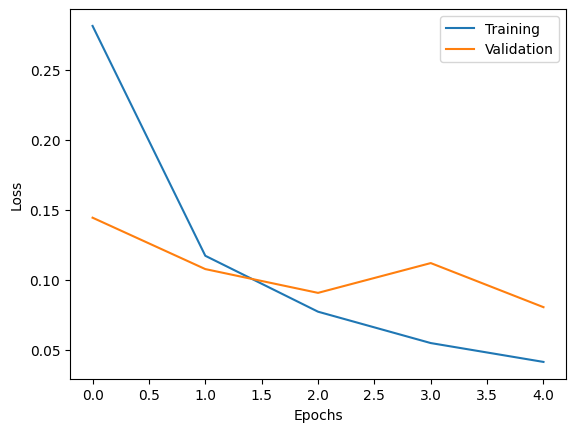

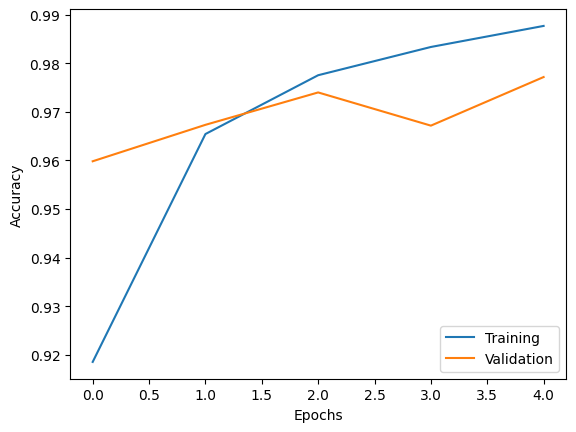

In [37]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

In [38]:
%load_ext tensorboard

In [39]:
network.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Visual

In [60]:


x = test_images
preds=network.predict()



#preds=network.predict()

#train_images = train_images.astype('float32') / 255




array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [47]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(test_images ,np.argmax(preds,axis=1))

#https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

In [48]:

import seaborn as sns; #sns.set()
ax = sns.heatmap(conf, annot=True, fmt='d', cmap=plt.cm.Blues)
ax.set(xlabel='Predicted Label',
       ylabel='True label')

NameError: name 'conf' is not defined